In [1]:
import numpy as np
import numba 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

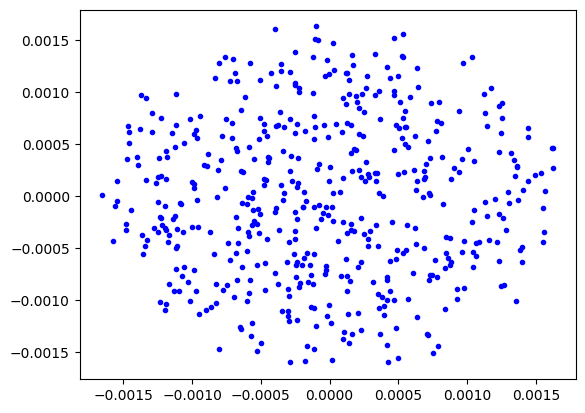

In [2]:
# Check whether sampling logic workds
RMAX = 5e-9
size = 500
separation = 3e-8
n = 3 # or any positive integer
points = np.random.normal(size=(size, n)) 
points /= np.linalg.norm(points, axis=1)[:, np.newaxis]
rs = np.random.uniform(0,RMAX,size=size)
rs = np.power(rs,1/n) # Not scaled by cube root
points = rs.reshape(-1,1) * points
points[:,0] = points[:,0]#+separation
plt.plot(points[:,0],points[:,1],'b.')
plt.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])

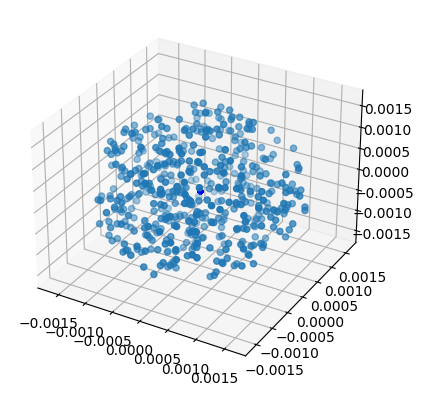

In [3]:
# Check whether sampling logic workds
RMAX = 5e-9
size = 500
separation = 1e-7
n = 3 # or any positive integer
points = np.random.normal(size=(size, n)) 
points /= np.linalg.norm(points, axis=1)[:, np.newaxis]
rs = np.random.uniform(0,RMAX**n,size=size)
rs = np.power(rs,1/n) # Now scaled by cube root
points = rs.reshape(-1,1) * points
points[:,0] = points[:,0]#+separation
plt.plot(points[:,0],points[:,1],'b.')
plt.show()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])

In [5]:
RMAX = 5e-9
size = 1000000
separation = 3e-8
n = 3 # or any positive integer
points = np.random.normal(size=(size, n)) 
points /= np.linalg.norm(points, axis=1)[:, np.newaxis]
rs = np.random.uniform(0,RMAX**n,size=size)
rs = np.power(rs,1/n)
points = rs.reshape(-1,1) * points
points[:,0] = points[:,0]+separation

In [6]:
rho = 1
rho *= 1e27
V = (4 * np.pi * RMAX**3)/3;
h = 6.6260688e-34;
mu0 = 4 * np.pi * 10**(-7)
muB = 9.274e-24
ge = 2

N_Spins = 1

try:
    xx_interaction_at_point
except:
    @numba.njit()
    def xx_interaction_at_point(point):
        x, y, z = point
        rsq = x**2 + y**2 + z**2
        return (ge * muB)**2 * mu0 * rho * V / (4 * np.pi) / rsq**(3/2) *(1 - 3*x**2 / rsq) / h / 1e6

    @numba.njit()
    def xy_interaction_at_point(point):
        x, y, z = point
        rsq = x**2 + y**2 + z**2
        return (ge * muB)**2 * mu0 * rho * V / (4 * np.pi) / rsq**(3/2) *(-3*x*y / rsq) / h / 1e6

    @numba.njit()
    def xz_interaction_at_point(point):
        x, y, z = point
        rsq = x**2 + y**2 + z**2
        return (ge * muB)**2 * mu0 * rho * V / (4 * np.pi) / rsq**(3/2) *(-3*x*z / rsq) / h / 1e6


    @numba.njit()
    def yy_interaction_at_point(point):
        x, y, z = point
        rsq = x**2 + y**2 + z**2
        return (ge * muB)**2 * mu0 * rho * V / (4 * np.pi) / rsq**(3/2) *(1 - 3*y**2 / rsq) / h / 1e6

    @numba.njit()
    def yz_interaction_at_point(point):
        x, y, z = point
        rsq = x**2 + y**2 + z**2
        return (ge * muB)**2 * mu0 * rho * V / (4 * np.pi) / rsq**(3/2) *(-3*y*z / rsq) / h / 1e6

    @numba.njit()
    def zz_interaction_at_point(point):
        x, y, z = point
        rsq = x**2 + y**2 + z**2
        return (ge * muB)**2 * mu0 * rho * V / (4 * np.pi) / rsq**(3/2) *(1 - 3*z*z / rsq) / h / 1e6


In [7]:
%%time
from multiprocessing import Process


interactions_xx = np.apply_along_axis(xx_interaction_at_point, 1, points)
interactions_xy = np.apply_along_axis(xy_interaction_at_point, 1, points)
interactions_xz = np.apply_along_axis(xz_interaction_at_point, 1, points)

interactions_yy = np.apply_along_axis(yy_interaction_at_point, 1, points)
interactions_yz = np.apply_along_axis(yz_interaction_at_point, 1, points)

interactions_zz = np.apply_along_axis(zz_interaction_at_point, 1, points)


CPU times: user 6.02 s, sys: 801 ms, total: 6.82 s
Wall time: 5.77 s


In [8]:
import scipy.stats as scs
from scipy.optimize import curve_fit

In [9]:
loc, scale = scs.cauchy.fit(interactions_xz + interactions_yz + interactions_zz)
cauchydist = scs.cauchy(loc=loc,scale=scale)


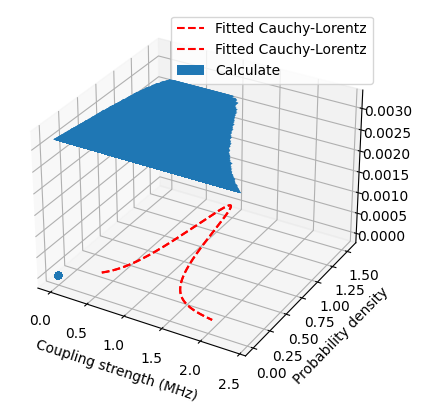

In [11]:
nbins = 500
xs = np.linspace(0.4,2.0,1000)
ys = cauchydist.pdf(xs)
plt.plot(xs, ys, 'r--', label='Fitted Cauchy-Lorentz')
n, bins, _ = plt.hist(interactions_xz + interactions_yz + interactions_zz, bins=nbins, density=True, label='Calculate')
plt.legend()
plt.xlabel("Coupling strength (MHz)")
plt.ylabel("Probability density")
plt.savefig('bestfit.pdf')
plt.show()

In [12]:
%%time
loc, scale = scs.cauchy.fit(interactions_xz + interactions_yz + interactions_zz)

CPU times: user 463 ms, sys: 198 µs, total: 463 ms
Wall time: 462 ms


In [13]:
print(loc, scale)

0.9411487764424203 0.20718418492394242


In [14]:
cauchydist = scs.cauchy(loc=loc,scale=scale)

In [15]:
cauchydist.pdf(0.2)

0.11135729562572652

In [21]:
gammabath = 1 / (2 * 1e-3) / 1e6
print(f"{gammabath=}")

gammabath=0.0005


In [18]:
SxSx = np.kron(Sx,Sx)
SySy = np.kron(Sy,Sy)
minus1 = [0,0,-1]
zero = [0,1,0]
one = [1,0,0]
state1 = np.kron(minus1,zero)
state2 = np.kron(zero,minus1)

In [20]:
gammae = 28000 #Mhz
deltaB = 0.5 / 1e4 * 30 # 0.5G/nm -> T * 30nm
centre_difference = gammae*(deltaB)
cauchydistone = scs.cauchy(loc=0,scale=scale)
cauchydistother = scs.cauchy(loc=centre_difference, scale=scale)

xs = np.linspace(-20,100,10000)
dx = (100-(-20)) / 10000
y1s, y2s = cauchydistone.pdf(xs), cauchydistother.pdf(xs)
densityofstates = dx*np.dot(y1s,y2s)


Cxx = np.mean(interactions_xx)
Cyy = np.mean(interactions_yy)
V = Cxx * SxSx + Cyy*SySy
state1s = [np.kron(minus1,minus1), np.kron(minus1,zero), np.kron(minus1,minus1),np.kron(zero,minus1), np.kron(minus1,zero), np.kron(zero,zero)]
state2s = [np.kron(zero,zero), np.kron(zero,minus1), np.kron(one,one), np.kron(one,one), np.kron(one,one), np.kron(one,one)]
gammabath = 1 / (2 * 1e-3) / 1e6
tests = [np.abs(np.dot(state1,V @ state2))**2*densityofstates for state1, state2 in zip(state1s, state2s)]
print(np.sum(tests))

0.00035970659177355274


In [36]:
meancxx = np.mean(interactions_xx)

In [38]:
centre_difference

42.0

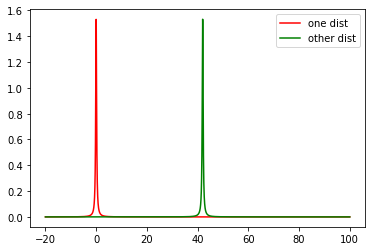

In [39]:
cauchydistone = scs.cauchy(loc=0,scale=scale)
cauchydistother = scs.cauchy(loc=centre_difference, scale=scale)

xs = np.linspace(-20,100,10000)
dx = (100-(-20)) / 10000
y1s, y2s = cauchydistone.pdf(xs), cauchydistother.pdf(xs)
plt.plot(xs, y1s, 'r-', label='one dist')
plt.plot(xs,y2s, 'g-', label='other dist')
plt.legend()
plt.show()

In [44]:
densityofstates = dx*np.dot(y1s,y2s)
print(densityofstates) # / MHz

7.498772336418851e-05


In [45]:
gammabathMHz = 1 / (2 * 1e-3) / 1e6
totalgamma = scale + stateoverlap * densityofstates + gammabathMHz

In [46]:
totalgamma

0.2084357293356753

In [48]:
scale

0.20791670038014073

In [49]:
omega = np.mean(interactions_zz)

In [50]:
omega / scale

4.845660830975782

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5eda81c9-4362-43d3-8842-280b10ca2cbd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>